In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import numpy as np
#import altair as alt
import matplotlib.pyplot as plt

In another code all data was cleaned up via python: Following the approach developed in Section 2.2 to read the files for the female runners and 
then process them using the functions in Section 2.3 to create a data frame for analysis. You may need to generalize the createDF() and extractVariables() 
functions to handle additional oddities in the raw text files. 

In [3]:
#df = pd.read_csv("/home/jjschued/Documents/womensrace.csv")
#dfm = pd.read_csv("C:/Users/jjschued/Documents/SMU/7333 QTW/mensrace.csv")
#dfm = pd.read_csv("https://raw.githubusercontent.com/jjschueder/7333QTW/master/Case%20Study%202/mensrace.csv")
#dfw = pd.read_csv("https://raw.githubusercontent.com/jjschueder/7333QTW/master/Case%20Study%202/womensrace.csv")
#dfm['Gender'] = "Male"
#dfw = pd.read_csv("C:/Users/jjschued/Documents/SMU/7333 QTW/womensrace.csv")
#dfw['Gender'] = "Female"
#df = dfm.append(dfw)
df = pd.read_csv('https://raw.githubusercontent.com/jjschueder/7333QTW/master/Case%20Study%202/StevensFinal.csv',low_memory=False)
# verify data read in
df.tail(100)

,Gender,year,place,div_total,name,age,hometown,time,pace,numId,...,time_length,fcobmine,finaltime,hour,minutes,seconds,dursecs,durationminutes,calcpace,counter
145940,Male,2012,7094,922/931,Stephen Godfrey,44.0,Arlington VA,NaN,12:57,16558,...,7,2:09:22,1/1/1900 2:09,2,9,22,7762,129.366667,12.936667,1.0
145941,Male,2012,7095,638/648,Elliott Lomax,46.0,Bowie MD,NaN,12:57,13540,...,7,2:09:27,1/1/1900 2:09,2,9,27,7767,129.450000,12.945000,1.0
145942,Male,2012,7096,1078/1093,Brian Hughes,35.0,Herndon VA,NaN,12:57,21251,...,7,2:09:29,1/1/1900 2:09,2,9,29,7769,129.483333,12.948333,1.0
145943,Male,2012,7097,923/931,Jerry McGuigan,41.0,Waldorf MD,NaN,12:58,20710,...,7,2:09:32,1/1/1900 2:09,2,9,32,7772,129.533333,12.953333,1.0
145944,Male,2012,7098,369/375,John Storey,55.0,York PA,NaN,12:58,8905,...,7,2:09:32,1/1/1900 2:09,2,9,32,7772,129.533333,12.953333,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146035,Male,2012,7189,1092/1093,Jurek Grabowski,39.0,Fairfax VA,NaN,14:44,19845,...,7,2:27:11,1/1/1900 2:27,2,27,11,8831,147.183333,14.718333,1.0
146036,Male,2012,7190,375/375,Larry Hume,56.0,Arlington VA,NaN,14:44,18780,...,7,2:27:20,1/1/1900 2:27,2,27,20,8840,147.333333,14.733333,1.0
146037,Male,2012,7191,1093/1093,Sean-Patrick Alexander,35.0,Alexandria VA,NaN,14:45,19104,...,7,2:27:30,1/1/1900 2:27,2,27,30,8850,147.500000,14.750000,1.0
146038,Male,2012,7192,,Joseph White,NaN,Forestville MD,NaN,14:54,22280,...,7,2:28:58,1/1/1900 2:28,2,28,58,8938,148.966667,14.896667,1.0


In [ ]:
df.head(100)

In [ ]:
df.info()

In [ ]:
df.dtypes

Various cleanup to do analysis on time.  Covnerting to time format, then converting into seconds. 

In [ ]:
df['time_length'] = df['combtime'].apply(len)

In [ ]:
df['index'] = np.arange(len(df))
df = df.set_index('index') 

In [ ]:
df.loc[df.time_length == 5, 'fcobmine'] = "00:" + df['combtime']
df.loc[df.time_length == 7, 'fcobmine'] =  df['combtime']

In [ ]:
df['finaltime'] = pd.to_datetime(df['fcobmine'], format='%H:%M:%S')

In [ ]:
df = df.dropna(subset=['fcobmine'])

In [ ]:
df['hour'] = df['finaltime'].dt.strftime("%H")
df['minutes'] = df['finaltime'].dt.strftime("%M")
df['seconds'] = df['finaltime'].dt.strftime("%S")

df['dursecs'] = pd.to_numeric(df['hour']) * 3600 + pd.to_numeric(df['minutes']) * 60 + pd.to_numeric(df['seconds'])

A little cleanup of the age column.  After initial loading some of the ages contained alpha characters. Those characters are removed here.

In [ ]:
df['agenum'] =df['age']

In [ ]:
df['agenum'] =df['age'].replace(r"[a-zA-Z]",'')


In [ ]:
df['agenum'] = df['agenum'].replace('25 12', '25')



In [ ]:
df['agenum'] = df['agenum'].replace('55 .', '55')
df['agenum'] = df['agenum'].replace('r 31', '31')
df['agenum'] = df['agenum'].replace('n 31', '31')
df['agenum'] = df['agenum'].replace('a 30', '30')
df['agenum'] = df['agenum'].replace('XX', '30')
df['agenum'] = df['agenum'].replace('r 35', '35')
df['agenum'] = df['agenum'].replace('a 28', '28')
df['agenum'] = df['agenum'].replace('a 31', '31')
df['agenum'] = df['agenum'].replace('c 39', '39')
df['agenum'] = df['agenum'].replace('n 32', '32')
df['agenum'] = df['agenum'].replace('r 33', '33')
df['agenum'] = df['agenum'].replace('l 39', '39')


In [ ]:
df['agenum'] = pd.to_numeric(df['agenum'])

In [ ]:
df['durationminutes'] = df['dursecs'] / 60

In [ ]:
df2012 = df.loc[df['year'] == 2012]

In [ ]:
df2012

In [ ]:
#df = df.replace(r'^\s+$', np.nan, regex=True)
df = df.dropna(subset=['agenum'])

Check out results of cleaning

In [ ]:
df.head()

In [ ]:
bins = [1, 19, 24, 29,
34,
39,
44,
49,
54,
59,
64,
69,
74,
79,
99]
df['agebinned'] = pd.cut(df['agenum'], bins)

In [ ]:
df.tail()

In [ ]:
#get a time stamp for change point
from datetime import datetime
df["date"] = '-04-01'
df["racetimestamp"] = df['year'].astype(str)  + df['date']

In [ ]:
df["racetimestamp2"] = pd.to_datetime(df["racetimestamp"])

### Basic Visualizations

We have seen that the 1999 runners were typically older than the 2012 runners. Compare the age distribution of the [female] runners across all 14 years of the races. Use quantile–quantile plots, boxplots, and density curves to make your comparisons. How do the distributions change over the years? Was it a gradual change? 

In [ ]:
df['counter'] = 1
dfgrpby = df.groupby(by=['year', 'Gender', 'agebinned'])
runnercounts = dfgrpby.counter.sum()
dfrc = pd.DataFrame(runnercounts)

#### Summary Statistics 

In [ ]:
plt.rcParams['figure.figsize']=20,10

In [ ]:
dfrc

In [ ]:
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings
sns.countplot(x='year', data=df);

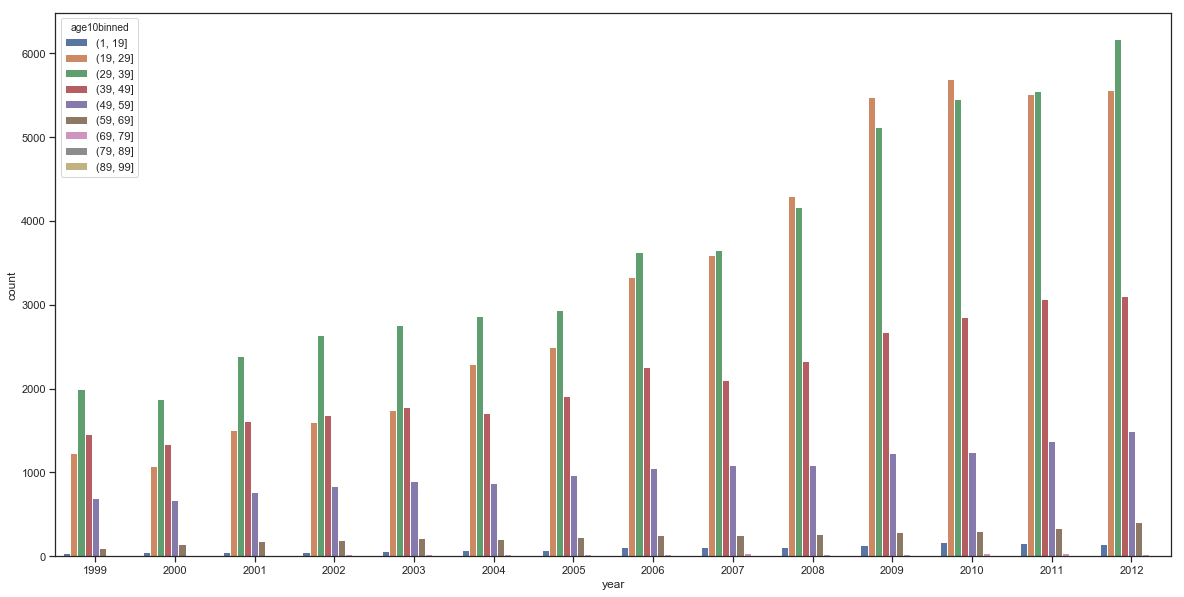

In [437]:
bigbins = [1, 19, 29,
39,
49,
59,
69,
79,
89,
99]
df['age10binned'] = pd.cut(df['agenum'], bigbins)
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings
sns.countplot(x='year', hue='age10binned',data=df);

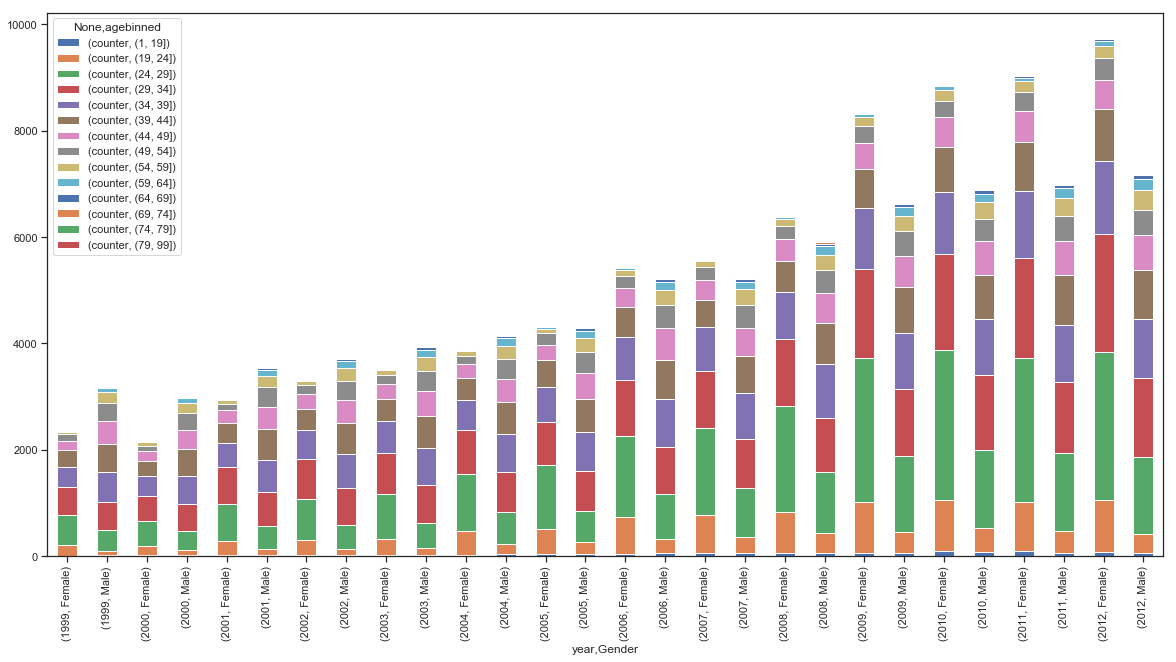

In [438]:
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings
dfrc.unstack().plot(kind='bar', stacked=True)

#### Boxplots

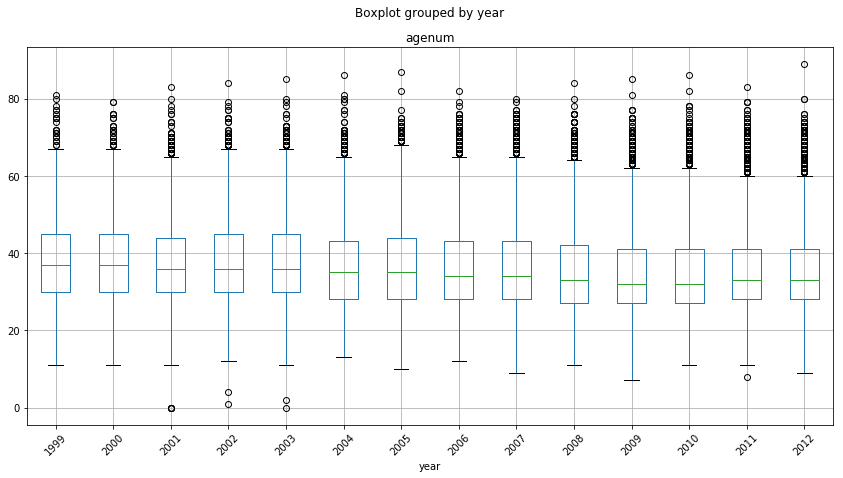

In [372]:
# display boxplot 
bx = df.boxplot(column = 'agenum', by = 'year', figsize=(14,7))
plt.xticks(rotation=45)
bx

In [373]:
df.dtypes

0                          object
Gender                     object
age                        object
calcpace                  float64
combtime                   object
counter                     int64
div_total                  object
durationminutes           float64
dursecs                     int64
fcobmine                   object
finaltime          datetime64[ns]
guntime                    object
hometown                   object
hour                       object
minutes                    object
name                       object
netTime                    object
numId                      object
pace                       object
place                       int64
seconds                    object
time                       object
time_length                 int64
year                        int64
agenum                    float64
agebinned                category
date                       object
racetimestamp              object
racetimestamp2     datetime64[ns]
age10binned   

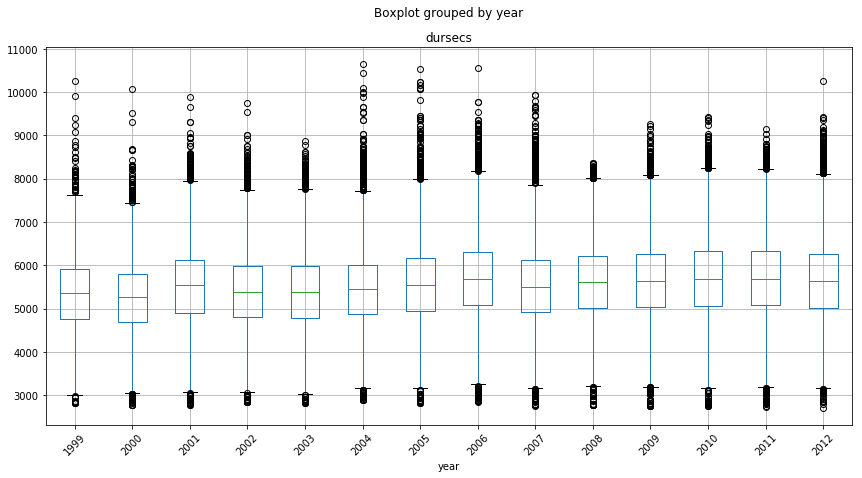

In [374]:
bx = df.boxplot(column = 'dursecs', by = 'year', figsize=(14,7))
plt.xticks(rotation=45)
bx

In [375]:
df['avgmile'] = df['dursecs'] / 10 

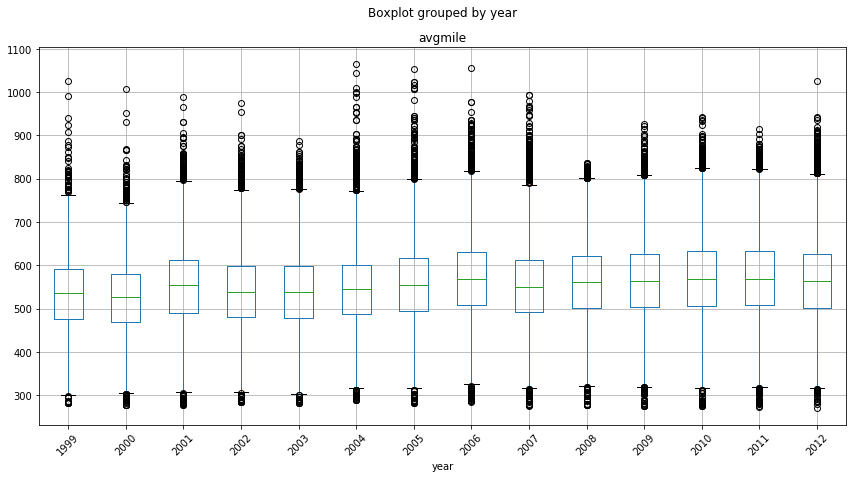

In [376]:
bx = df.boxplot(column = 'avgmile', by = 'year', figsize=(14,7))
plt.xticks(rotation=45)
bx

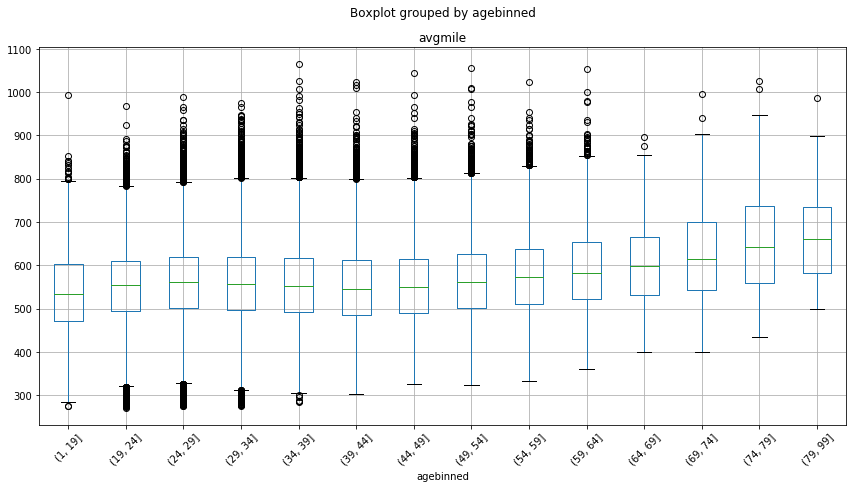

In [377]:
bx = df.boxplot(column = 'avgmile', by = 'agebinned', figsize=(14,7))
plt.xticks(rotation=45)
bx

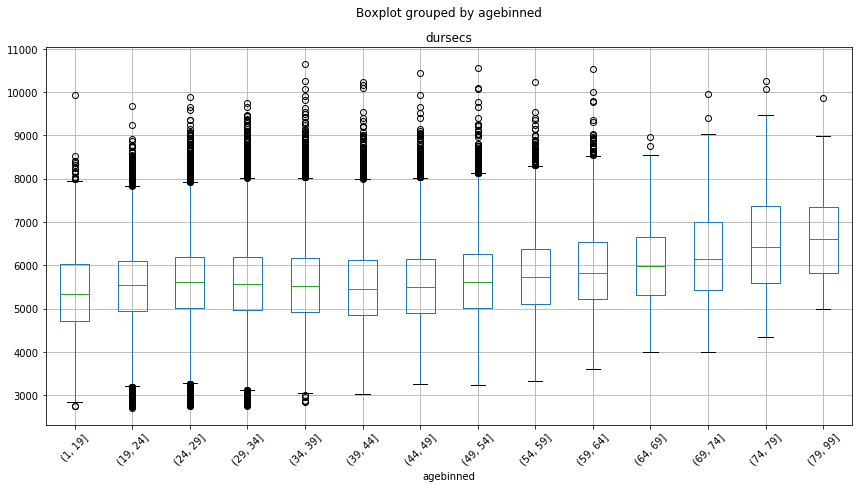

In [378]:
bx = df.boxplot(column = 'dursecs', by = 'agebinned', figsize=(14,7))
plt.xticks(rotation=45)
bx

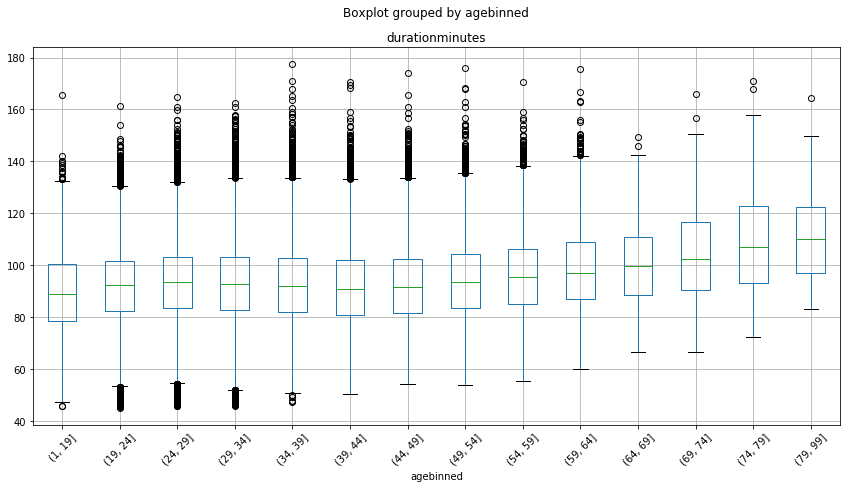

In [379]:
bx = df.boxplot(column = 'durationminutes', by = 'agebinned', figsize=(14,7))
plt.xticks(rotation=45)
bx

Text(0.5, 1.0, 'Pair Plots by with Year Coloring')

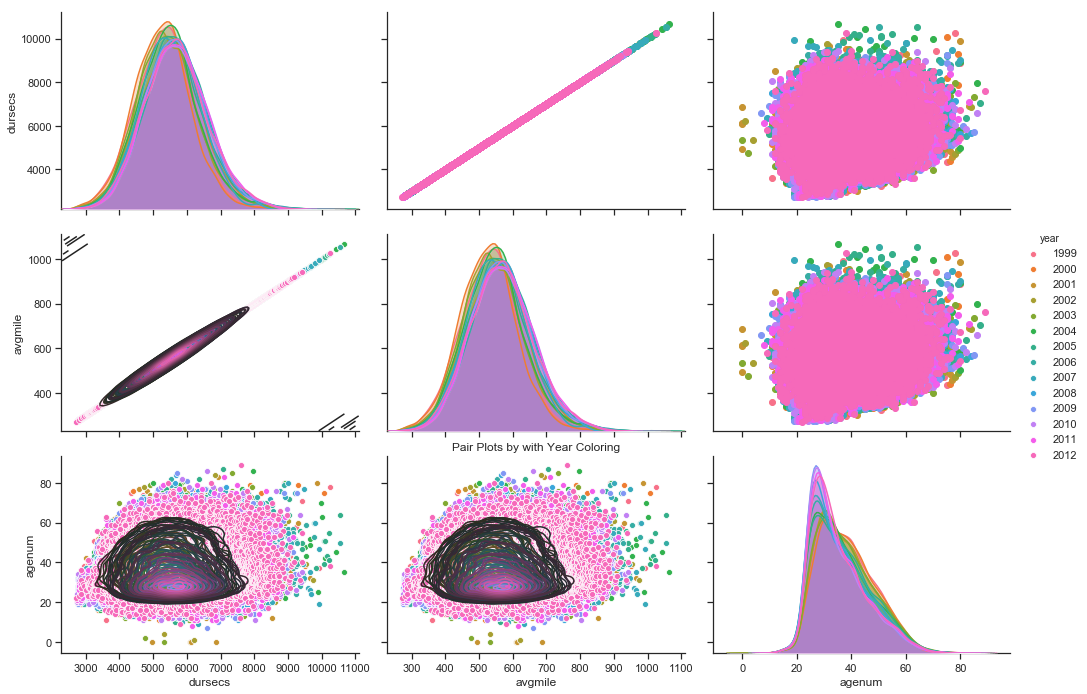

In [381]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df, vars=["dursecs", "avgmile", "agenum"], hue = "year", height=3.27, aspect=4.7/3.27)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
#iris = sns.load_dataset("iris")8.7/8.27)
plt.title('Pair Plots by with Year Coloring')

Text(0.5, 1.0, 'Pair Plots by with Year Coloring')

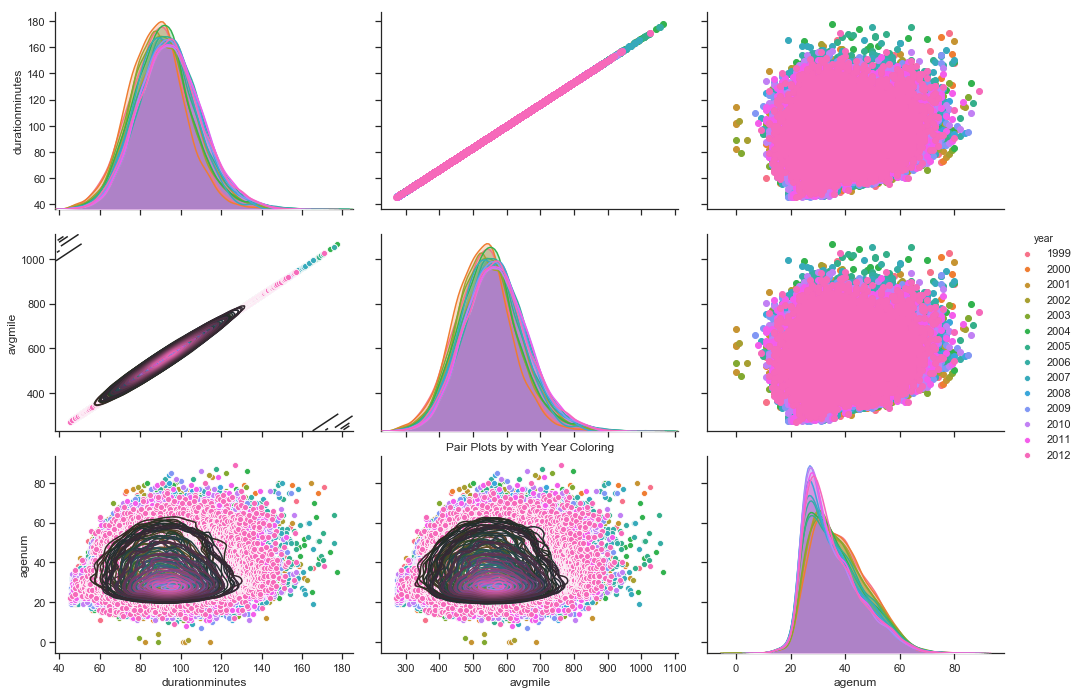

In [382]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df, vars=["durationminutes", "avgmile", "agenum"], hue = "year", height=3.27, aspect=4.7/3.27)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
#iris = sns.load_dataset("iris")8.7/8.27)
plt.title('Pair Plots by with Year Coloring')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

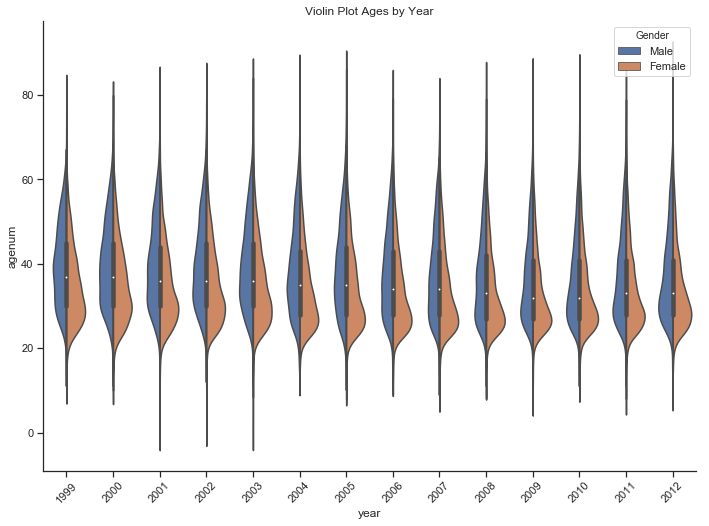

In [383]:
# plot
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.violinplot(x="year", y="agenum",hue="Gender", data=df,split=True)    
sns.despine()
plt.title('Violin Plot Ages by Year')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

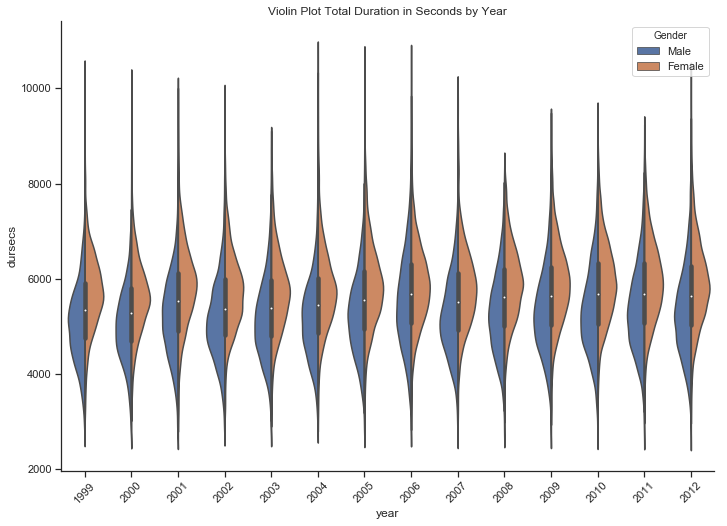

In [384]:
# plot
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.violinplot(x="year", y="dursecs",hue="Gender", data=df,split=True)    
sns.despine()
plt.title('Violin Plot Total Duration in Seconds by Year')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

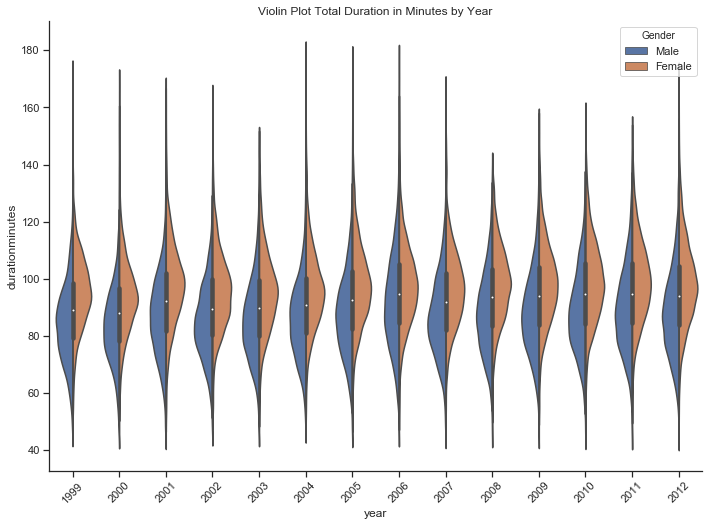

In [385]:
# plot
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.violinplot(x="year", y="durationminutes",hue="Gender", data=df,split=True)    
sns.despine()
plt.title('Violin Plot Total Duration in Minutes by Year')
plt.xticks(rotation=45)

In [386]:
FemaleDur=df[df['Gender']=='Female']
maleDur=df[df['Gender']=='Male']
print(df.shape)
print(FemaleDur.shape)
print(maleDur.shape)

(145994, 31)
(75950, 31)
(70044, 31)


In [387]:
import pingouin as pg
print(pg.normality(df,dv='agenum',group='Gender'))


ModuleNotFoundError: No module named 'pingouin'

In [ ]:
print("t-test")
print(pg.ttest(maleDur.durationminutes, FemaleDur.durationminutes, correction='auto'))

In [ ]:
print("t-test")
print(pg.ttest(maleDur.agenum, FemaleDur.agenum, correction='auto'))

In [ ]:
FemaleDur=df[df['Gender']=='Female']
maleDur=df[df['Gender']=='Male']
print(df.shape)
print(FemaleDur.shape)
print(maleDur.shape)

print("t-test")
print(pg.ttest(maleDur.durationminutes, FemaleDur.durationminutes,tail = 'greater', correction='auto'))

In [4]:
# List of years to plot
years = [1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012]

# Iterate through the five airlines
for years in years:
    # Subset to the airline
    subset = df[df['year'] == years]
    
    # Draw the density plot
    g = sns.distplot(subset['agenum'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = years)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'Year')
plt.title('Density Plot with Multiple Year')
plt.rcParams['figure.figsize']=20,10
plt.xlabel('Distribution')
plt.ylabel('Age')

KeyError: 'agenum'

In [ ]:
# List of years to plot
years = [1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012]
f, axes = plt.subplots(5, 3, figsize=(20, 20), sharex=True)
# Iterate through the five airlines
x = 0
y = 0
for years in years:
    # Subset to the airline
    subset = df[df['year'] == years]
    # Draw the density plot
    g = sns.distplot(subset['agenum'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = years, ax=axes[x, y])
    y += 1
    if (y% 3 == 0):
     x += 1
     y = 0
# Plot formatting
plt.legend(prop={'size': 16}, title = 'Year')
plt.title('Density Plot with Multiple Year')
#plt.rcParams['figure.figsize']=20,10
plt.xlabel('Distribution')
plt.ylabel('Age')
plt.xticks(rotation=45)


In [ ]:
# Make a separate list for each year
x1 = list(df[df['year'] == 1999]['agenum'])
x2 = list(df[df['year'] == 2000]['agenum'])
x3 = list(df[df['year'] == 2001]['agenum'])
x4 = list(df[df['year'] == 2002]['agenum'])
x5 = list(df[df['year'] == 2003]['agenum'])
x6 = list(df[df['year'] == 2004]['agenum'])
x7 = list(df[df['year'] == 2005]['agenum'])
x8 = list(df[df['year'] == 2006]['agenum'])
x9 = list(df[df['year'] == 2007]['agenum'])
x10 = list(df[df['year'] == 2008]['agenum'])
x11 = list(df[df['year'] == 2009]['agenum'])
x12 = list(df[df['year'] == 2010]['agenum'])
x13 = list(df[df['year'] == 2011]['agenum'])
x14 = list(df[df['year'] == 2012]['agenum'])
# Assign colors for each airline and the names
colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00']
names = [1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012]
         
# Make the histogram using a list of lists
# Normalize the flights and assign colors and names
plt.hist([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14], bins = int(180/15), normed=True,
          label=names)

# Plot formatting
plt.legend()
plt.xlabel('Age')
plt.ylabel('Normalized')
plt.title('Side-by-Side Histogram with Age and Years')
plt.xticks(rotation=45)

In [ ]:
plt.rcParams['figure.figsize']=20,10
g = sns.FacetGrid(df, col="year", height=4, aspect=.5)
g.map(sns.barplot, "agenum");

In [ ]:
ordered_days = df.year.value_counts().index
g = sns.FacetGrid(df, row="year",  
                  height=1.7, aspect=4,)
g.map(sns.distplot, "agenum", hist=False, rug=True);

In [ ]:
ordered_days = df.year.value_counts().index
g = sns.FacetGrid(df, row="year",  
                  height=1.7, aspect=4,)
g.map(sns.distplot, "agenum", hist=False, kde = True);

In [ ]:
df.info()

In [ ]:
g = sns.FacetGrid(df, row="year",  margin_titles=True, height=5)
g.map(plt.scatter, "agenum", "dursecs", color="#338844", edgecolor="white", s=50, lw=1)
for ax in g.axes.flat:
    m, b = np.polyfit(df['agenum'], df['dursecs'], 1)
    ax.plot(df['agenum'], m*df['agenum'] + b)
#g.set(xlim=(0, 60), ylim=(0, 14));

In [ ]:
g = sns.FacetGrid(df, row="year",  margin_titles=True, height=5)
g.map(plt.scatter, "agenum", "durationminutes", color="#338844", edgecolor="white", s=50, lw=1)
for ax in g.axes.flat:
    m, b = np.polyfit(df['agenum'], df['durationminutes'], 1)
    ax.plot(df['agenum'], m*df['agenum'] + b)
#g.set(xlim=(0, 60), ylim=(0, 14));

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [ ]:
features = ["agenum", "durationminutes"]

X2 = df[features].copy()

scaler = StandardScaler()
scaler.fit(X2)
X = scaler.transform(X2)

In [ ]:
dfscale = pd.DataFrame(X)

In [ ]:
dfscale.head()

In [ ]:
df = pd.merge(df, dfscale, how = 'inner', left_index = True, right_index = True)

In [ ]:
df = df.rename({0: 'agescale', 1: 'minutescale'}, axis=1)  # new method

In [ ]:
bx = df.boxplot(column = 'minutescale', by = 'age10binned', figsize=(14,7))
plt.xticks(rotation=45)
bx

In [ ]:
bx = df.boxplot(column = 'agescale', by = 'year', figsize=(14,7))
plt.xticks(rotation=45)
bx

In [ ]:
bx = df.boxplot(column = 'minutescale', by = 'year', figsize=(14,7))
plt.xticks(rotation=45)
bx

In [ ]:
g = sns.FacetGrid(df, row="year",  margin_titles=True, height=5)
g.map(plt.scatter, "agenum", "minutescale", color="#338844", edgecolor="white", s=50, lw=1)
for ax in g.axes.flat:
    m, b = np.polyfit(df['agenum'], df['minutescale'], 1)
    ax.plot(df['agenum'], m*df['minutescale'] + b)
#g.set(xlim=(0, 60), ylim=(0, 14));

#### change point detection

In [ ]:
#get unique people

#crunch names and lower case

df['namelower'] = df['name'].str.lower()
df['namelower'] = df['namelower'].str.replace(' ', '')

In [ ]:
df.head()

In [79]:
df.tail()

,Gender,year,place,div_total,name,age,hometown,time,pace,numId,...,agebinned,date,racetimestamp,racetimestamp2,counter,age10binned,avgmile,agescale,minutescale,namelower
129356,Female,2011,8725,1220/1265,Regina Shea,35,Arlington VA,NaN,12:46,11764,...,"(34, 39]",-04-01,2011-04-01,2011-04-01,1,"(29, 39]",765.8,-0.989256,-0.614011,reginashea
129357,Female,2011,8726,924/937,Laura Stevenson,24,Germantown MD,NaN,12:46,15699,...,"(19, 24]",-04-01,2011-04-01,2011-04-01,1,"(19, 29]",765.8,0.071440,-0.614011,laurastevenson
129358,Female,2011,8727,1801/1866,Aimee Leturmy,32,Williamsburg VA,NaN,12:46,19278,...,"(29, 34]",-04-01,2011-04-01,2011-04-01,1,"(29, 39]",765.9,-0.121414,-0.614011,aimeeleturmy
129359,Female,2011,8728,198/208,Cherry Gaffney,57,Alexandria VA,NaN,12:46,8991,...,"(54, 59]",-04-01,2011-04-01,2011-04-01,1,"(49, 59]",766.0,0.167867,-0.614011,cherrygaffney
129360,Female,2011,8729,336/357,Donna Bowling,50,Reston VA,NaN,12:47,18626,...,"(49, 54]",-04-01,2011-04-01,2011-04-01,1,"(49, 59]",766.1,0.360721,-0.614011,donnabowling


In [80]:
dfgrpby3 = df.groupby(by=['namelower'])
runnercounts3 = dfgrpby3.counter.sum()
dfrc3 = pd.DataFrame(runnercounts3)

In [81]:
dfrc3

,counter
namelower,
8illiammaury,1
a.c.cooper,1
a.glymph,1
a.gudumemon,1
a.j.bittner,1
...,...
zunlin,1
zurabsajaia,2
zurayatapia,1


In [82]:
names = dfrc3.sort_values(by='counter', ascending=False).head(1000)

In [84]:
names

,counter
namelower,
michaelsmith,29
jenniferjohnson,19
lindakennedy,18
davidsmith,18
michaelbrown,16
...,...
jamesweiss,7
walterbrown,7
kevinsullivan,7


In [85]:
df2012 = df.loc[df['year'] == 2011]
points=np.array(df2012['agenum'])

In [86]:
len(points)

15605

In [87]:
import matplotlib.pyplot as plt
import ruptures as rpt
#Changepoint detection with the Pelt search method
model="rbf"
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
rpt.display(points, result, figsize=(10, 6))
plt.title('Change Point Detection: Pelt Search Method')
plt.show() 

ModuleNotFoundError: No module named 'ruptures'

In [88]:
# Authors: Alexandre Gramfort <alexandre.gramfort@telecom-paristech.fr>
#
# License: BSD (3-clause)

from math import ceil
import numpy as np
from scipy import linalg

def lowess(x, y, f=2. / 3., iter=3):
    """lowess(x, y, f=2./3., iter=3) -> yest
    Lowess smoother: Robust locally weighted regression.
    The lowess function fits a nonparametric regression curve to a scatterplot.
    The arrays x and y contain an equal number of elements; each pair
    (x[i], y[i]) defines a data point in the scatterplot. The function returns
    the estimated (smooth) values of y.
    The smoothing span is given by f. A larger value for f will result in a
    smoother curve. The number of robustifying iterations is given by iter. The
    function will run faster with a smaller number of iterations.
    """
    n = len(x)
    r = int(ceil(f * n))
    h = [np.sort(np.abs(x - x[i]))[r] for i in range(n)]
    w = np.clip(np.abs((x[:, None] - x[None, :]) / h), 0.0, 1.0)
    w = (1 - w ** 3) ** 3
    yest = np.zeros(n)
    delta = np.ones(n)
    for iteration in range(iter):
        for i in range(n):
            weights = delta * w[:, i]
            b = np.array([np.sum(weights * y), np.sum(weights * y * x)])
            A = np.array([[np.sum(weights), np.sum(weights * x)],
                          [np.sum(weights * x), np.sum(weights * x * x)]])
            beta = linalg.solve(A, b)
            yest[i] = beta[0] + beta[1] * x[i]

        residuals = y - yest
        s = np.median(np.abs(residuals))
        delta = np.clip(residuals / (6.0 * s), -1, 1)
        delta = (1 - delta ** 2) ** 2

    return yest

In [89]:
import math
n = 5968
x = np.linspace(80, 160 * math.pi, n)
y = np.sin(df2012['durationminutes']) + 0.3 * np.random.randn(n)

f = 0.25

ValueError: operands could not be broadcast together with shapes (15605,) (5968,) 

In [90]:

yest = lowess(np.array(df2012['agenum']), np.array(df2012['durationminutes']), f=f, iter=3)

TypeError: unsupported operand type(s) for *: 'Figure' and 'int'

In [82]:
len(yest)

5968

In [83]:
len(y)

5968

In [90]:
len(x)

5968

In [93]:
x

array([ 80.        ,  80.07083205,  80.14166409, ..., 502.51316048,
       502.58399253, 502.65482457])

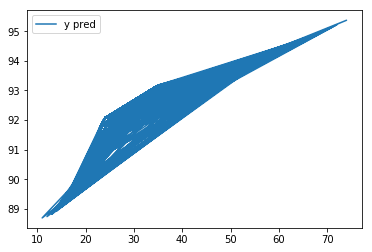

In [95]:
import pylab as pl
pl.clf()
#pl.plot(x, y, label='y noisy')
pl.plot(df2012['agenum'], yest, label='y pred')
pl.legend()
pl.show()

Automatically created module for IPython interactive environment
Computing regularization path using the LARS ...
.

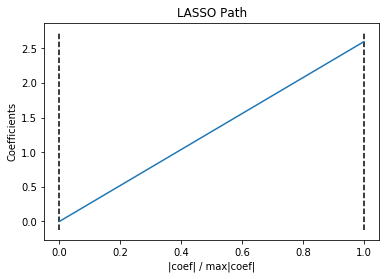

In [142]:
print(__doc__)

# Author: Fabian Pedregosa <fabian.pedregosa@inria.fr>
#         Alexandre Gramfort <alexandre.gramfort@inria.fr>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn import datasets

#X, y = datasets.load_diabetes(return_X_y=True)

print("Computing regularization path using the LARS ...")
_, _, coefs = linear_model.lars_path(df2012[['agenum']].values, df2012['durationminutes'], method='lasso', verbose=True)

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.show()

In [128]:
from sklearn import linear_model
rgr = linear_model.Ridge().fit(df2012[['agenum']], y = df2012['durationminutes'])

In [129]:
rgr

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [130]:
lars = linear_model.LassoLars(.1, normalize=False)
coef_lars_ = lars.fit(df2012[['agenum']], df2012['durationminutes']).coef_

In [134]:
lars = lars.fit(df2012[['agenum']], y = df2012['durationminutes'])

In [136]:
lars.coef_

array([0.05671306])